# Installing the dependencies

In [ ]:
!pip install mediapipe opencv-python

# Importing the libraries

In [12]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
import math
import seaborn as sns

print("Everything imported succesfully☑️")

Everything imported succesfully☑️


In [4]:
def angle_between_points(p1, p2):
    """
    Calculate the angle between two points in 3D space.

    Args:
        p1 (Point): First point, with attributes x, y, and z representing its coordinates.
        p2 (Point): Second point, with attributes x, y, and z representing its coordinates.

    Returns:
        float: Angle between the two points in degrees.

    Notes:
        - Requires the 'math' module.
        - The function uses the dot product of the vectors formed by the two points
          to calculate the angle between them.
    """
    x1, y1, z1 = p1.x, p1.y, p1.z
    x2, y2, z2 = p2.x, p2.y, p2.z

    # Calculate the dot product of the two vectors
    dot_product = x1 * x2 + y1 * y2 + z1 * z2

    # Calculate the magnitude of each vector
    magnitude1 = math.sqrt(x1**2 + y1**2 + z1**2)
    magnitude2 = math.sqrt(x2**2 + y2**2 + z2**2)

    # Calculate the cosine of the angle between the vectors
    cosine_angle = dot_product / (magnitude1 * magnitude2)

    # Use arccos to get the angle in radians
    angle_rad = math.acos(cosine_angle)

    # Convert radians to degrees
    angle_deg = math.degrees(angle_rad)

    return angle_deg

In [16]:
# Path to your video file
video_path = "../Test.mp4"

# Create a VideoCapture object to read from the video file
cap = cv2.VideoCapture(video_path)

# Initialize lists to store left-shoulder, right-shoulder, shoulder, right-elbow-hand, left-elbow-hand
angles_lse = []
angles_rse = []
angles_shoulders = []
angles_rew = []
angles_lew = []

with mp.solutions.pose.Pose(
    min_detection_confidence=0.8, min_tracking_confidence=0.8
) as pose:
    while cap.isOpened():
        success, frame = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Recolor frame to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make pose detections
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks and render them
        try:
            landmarks = results.pose_landmarks.landmark
            # Render detections
            mp.solutions.drawing_utils.draw_landmarks(
                image,
                results.pose_landmarks,
                mp.solutions.pose.POSE_CONNECTIONS,
                mp.solutions.drawing_utils.DrawingSpec(
                    color=(245, 117, 66), thickness=2, circle_radius=2
                ),
                mp.solutions.drawing_utils.DrawingSpec(
                    color=(245, 66, 230), thickness=2, circle_radius=2
                ),
            )

            # Retrieve left and right shoulder coordinates
            ls_cord = landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value]
            rs_cord = landmarks[mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER.value]

            le_cord = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
            re_cord = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]

            lw_cord = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
            rw_cord = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

            angles_shoulders.append(angle_between_points(ls_cord, rs_cord))
            angles_lse.append(angle_between_points(ls_cord, le_cord))
            angles_rse.append(angle_between_points(rs_cord, re_cord))
            angles_lew.append(angle_between_points(lw_cord, re_cord))
            angles_rew.append(angle_between_points(rw_cord, re_cord))
        except:
            pass

        cv2.imshow("Mediapipe Feed", image)

        if cv2.waitKey(10) & 0xFF == ord("q"):
            break

    cap.release()
    cv2.destroyAllWindows()

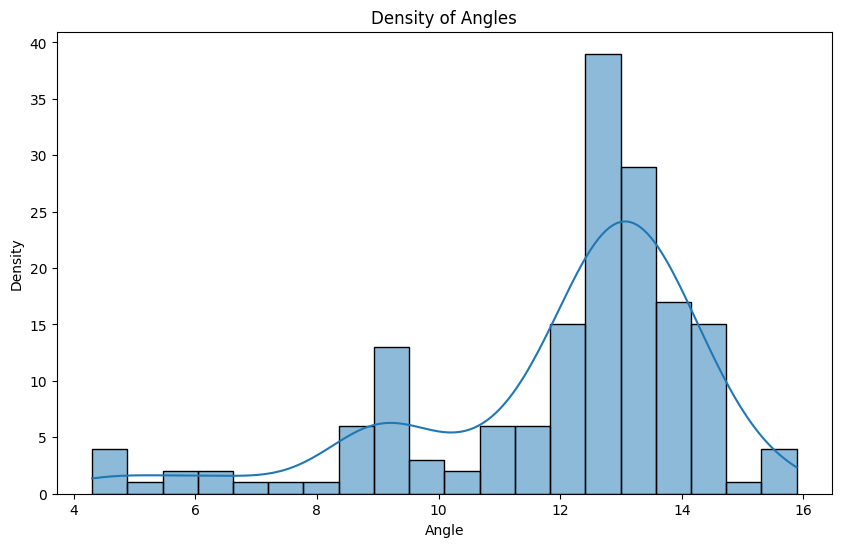

In [17]:
# Create a 2D histogram
plt.figure(figsize=(10, 6))
sns.histplot(angles_lse, bins=20, kde=True)

# Add labels and title
plt.xlabel("Angle")
plt.ylabel("Density")
plt.title("Density of Angles")

# Show plot
plt.show()

In [ ]:
# Print the lists of left and right shoulder coordinates
angles_shoulders

### Landmarks To Consider
- 11 : Left Shoulder
- 12 : Right Shoulder
- 13 : Left elbow
- 14 : Right elbow
- 15 : Left wrist
- 16:  Right wrist

In [6]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.62812525
y: 0.8630568
z: -0.700833
visibility: 0.9992993

In [ ]:
ls_cord = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
rs_cord = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]

le_cord = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
re_cord = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]

lw_cord = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
rw_cord = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

In [ ]:
angle = angle_between_points(ls_cord, rs_cord)
print("Angle between the two points:", angle, "degrees")